<a href="https://colab.research.google.com/github/emanuel379/Calculo-Numerico/blob/main/Emanuel_Victor_da_Silva_12558151_Turma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math as m
import statistics as stats
import urllib.request
from PIL import Image

**1 Decomposição em Valores Singulares (SVD)**



**a)** Escreva um código implementando o método de Francis usando a função numpy.linalg.qr para obter as
decomposições QR necessárias.


In [ ]:
# Método de Francis

def francis(A, tol):
    qr = np.linalg.qr  # Decomposição QR
    n = np.shape(A)[0]  # Tamanho da matriz
    A_local = np.copy(A)
    V = np.eye(n)  # Matriz identidade
    erro = np.inf

    while erro > tol:
        [Q, R] = qr(A_local)  #  Utilizando matriz local para a decomposição QR
        A_local = R.dot(Q)  # Atualizando a matriz local na forma RQ
        V = V.dot(Q)  # Atualizando V para VQ

        erro = np.max(np.max(np.abs(np.tril(A_local, -1))))  # Devolvendo o valor máximo da parte triangular inferior de A_local

    D = np.diag(A_local)  # Extraindo os elementos da diagonal de A_local

    return D, V

**b)** Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição
SVD de uma matriz qualquer Am×n.

In [ ]:
# Decomposição SVD

def svd_decomposition(A, tol):
    D, V = francis(A.T.dot(A), tol)  # Encontrando a decomposição SVD a partir do método de Francis implementado anteriormente
    S = np.sqrt(np.abs(D))  # Encontrando os valores singualares como raiz quadrada do módulo dos elementos da diagonal de A_local
    U = A.dot(V) / S  # Encontrando os vetores singulares esquerdos

    return U, S, V.T # Devolvendo U, S e V transposto como decomposição SVD

**c)** Podemos armazenar uma imagem em uma matriz Am×n. Toda imagem consiste em um conjunto de pixels
que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local
específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre 0 e
1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala de cinza com m×n
pixels pode ser armazenada em uma matriz m × n com valores entre 0 e 1. Use a função imread() da biblioteca
Matplotlib do Python para carregar uma imagem de uma foto pessoal em escala de cinza. Depois, use as
decomposições SVD numpy.linalg.svd e a implementada no item b) para comprimir a imagem, representando-a
por k (k < min{m, n}) valores singulares, isto é, troque a matriz A por Ak = U[:, : k] ∗ Σ[: k, : k] ∗ V
T
[: k, :].
Plote a imagem original e a imagem 50% e 70% comprimida e compare os resultados. Para tal, use a função
imshow(), também da biblioteca Matplotlib.

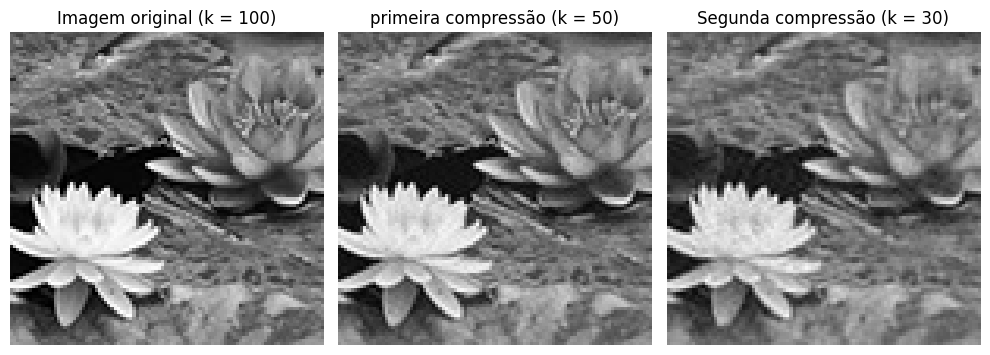

In [ ]:
# Com decomposição SVD

imagem = plt.imread('img_3.png') # utilizando imread() para abrir a imagem como um array
imagem = np.mean(imagem, axis=2) # Convertendo para preto e branco

U, S, Vt = svd_decomposition(imagem, tol = 1e-6) # Decomposição SVD

# Encontrando o número vetores singulares
k = int(min(U.shape[1], Vt.shape[0])) # número de valores singulares(k < min(m, n)) para a imagem original
k1 = int(min(U.shape[1], Vt.shape[0]) * 0.5) # número de valores singulares(k < min(m, n)) comprimidos em 50%
k2 = int(min(U.shape[1], Vt.shape[0]) * 0.3) # número de valores singulares(k < min(m, n)) comprimidos em 70%

# Comprimindo a imagem
imagem_comprimida1 = U[:, :k1] @ np.diag(S[:k1]) @ Vt[:k1, :] # 50% de compressão
imagem_comprimida2 = U[:, :k2] @ np.diag(S[:k2]) @ Vt[:k2, :] # 70% de compressão

# Plotando as três imagens lado a lado
plt.figure(figsize=(10, 8))

# Plotandoo a imagem original
plt.subplot(1, 3, 1)
plt.title(f'Imagem original (k = {k})')
plt.imshow(imagem, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

# Plotando a primeira imagem comprimida
plt.subplot(1, 3, 2)
plt.title(f'primeira compressão (k = {k1})')
plt.imshow(imagem_comprimida1, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

# Plotando a segunda imagem comprimida
plt.subplot(1, 3, 3)
plt.title(f'Segunda compressão (k = {k2})')
plt.imshow(imagem_comprimida2, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

plt.tight_layout() # Otimiza o plot para imagens lado a lado, melhorando visualmente a observação
plt.show()

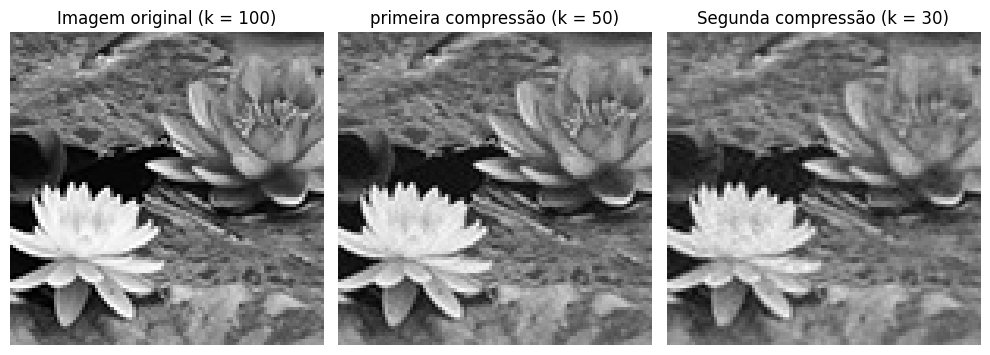

In [ ]:
# Utilizando função nativa do python

imagem = plt.imread('img_3.png') # utilizando imread() para abrir a imagem como um array
imagem = np.mean(imagem, axis=2) # Convertendo para preto e branco

U, S, Vt = np.linalg.svd(imagem) # utilizando biblioteca nativa para a decomposição SVD

# Determinando o valor de k1
k1 = int(min(imagem.shape[0], imagem.shape[1]) * 0.5) # número de valores singulares(k < min(m, n)) comprimidos em 50%

# Comprimindo as matrizes
U_truncada1 = U[:, :k1]
S_truncada1 = np.diag(S[:k1])
Vt_truncada1 = Vt[:k1, :]

# Reconstruindo a imagem comprimida
imagem_comprimida1 = U_truncada1 @ S_truncada1 @ Vt_truncada1

# Determinando o valor de k2
k2 = int(min(imagem.shape[0], imagem.shape[1]) * 0.3) # número de valores singulares(k < min(m, n)) comprimidos em 70%

# Comprimindo as matrizes
U_truncada2 = U[:, :k2]
S_truncada2 = np.diag(S[:k2])
Vt_truncada2 = Vt[:k2, :]

# Reconstruindo a imagem comprimida
imagem_comprimida2 = U_truncada2 @ S_truncada2 @ Vt_truncada2

# Plotando as três imagens lado a lado
plt.figure(figsize=(10, 8))

# Plotandoo a imagens original
plt.subplot(1, 3, 1)
plt.title(f'Imagem original (k = {k})')
plt.imshow(imagem, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

# Plotando a primeira imagem comprimida
plt.subplot(1, 3, 2)
plt.title(f'primeira compressão (k = {k1})')
plt.imshow(imagem_comprimida1, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

# Plotando a segunda imagem comprimida
plt.subplot(1, 3, 3)
plt.title(f'Segunda compressão (k = {k2})')
plt.imshow(imagem_comprimida2, cmap='gray')
plt.axis('off') # Eliminando os valores numéricos nos eixos gráficos

plt.tight_layout() # Otimiza o plot para duas imagens lado a lado, melhorando visualmente a observação
plt.show()

 Como podemos observar, tanto a compressão a partir da decomposição SVD implementada, quanto aquela feita utilizando função nativa do python, nos devolveram imagens com compressões de até 70% nos valores singulares, porém sem alterações significativas na qualidade das imagens, apenas um aparente leve escurecimento para a segunda compressão. Tal procedimento pode ser bastante útil para a redução do custo computacional para o armazenamento de imagens, sem acarretar em uma drástica perda, em termos de qualidade, destas.

**2 Interpolação**

Para a função

f(t) = 1/(1 + 25t^2)

no intervalo [−1, 1] faça:


**a)** Implemente a interpolação de Lagrange e de Newton.

[-1.         -0.86666667 -0.73333333 -0.6        -0.46666667 -0.33333333
 -0.2        -0.06666667  0.06666667  0.2         0.33333333  0.46666667
  0.6         0.73333333  0.86666667  1.        ]
[0.03846154 0.0505618  0.06923077 0.1        0.15517241 0.26470588
 0.5        0.9        0.9        0.5        0.26470588 0.15517241
 0.1        0.06923077 0.0505618  0.03846154]


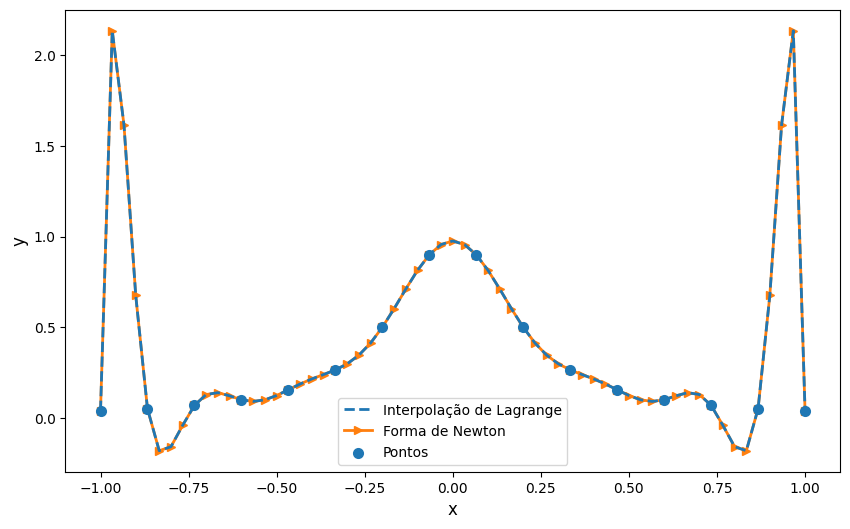

In [ ]:
# Interpolação de Lagrange

def lagrange_interp(xi,yi,x):
    n = np.size(xi) # maior dimensão de um vetor unidimensional
    m = np.size(x) # maior dimensão de um vetor unidimensional

    L = np.ones((n,m))

    for i in np.arange(n):
      for j in np.arange(n):
        if(i != j):
           L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j])

    y = yi.dot(L); # --> yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y

# Interpolação de Newton

def newton_interp(xi,yi,x):
  n = np.size(xi); ni = np.size(x); N = np.ones((n,ni))
  D = np.zeros((n,n)); D[:,0] = yi

  for j in np.arange(n-1): # matriz de diferenças divididas
      for i in np.arange(n-j-1):
          D[i,j+1] = (D[i+1,j]-D[i,j])/(xi[i+j+1]-xi[i])

  for i in np.arange(1,n): # loop do produtório da forma de Newton
      N[i,:] = N[i-1,:]*(x-xi[i-1])

  y = D[0,:].dot(N)

  return y

# Utilizando um exemplo com 16 pontos

xi = np.linspace(-1,1,num=16, endpoint=True)# 16 pontos igualmente espaçados
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exata = 1/(1+25*x**2)

y_lagrange16 = lagrange_interp(xi,yi,x)
y_newton16 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange16,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton16,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

**b)** Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e
Newton com o código implementado no item anterior.

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


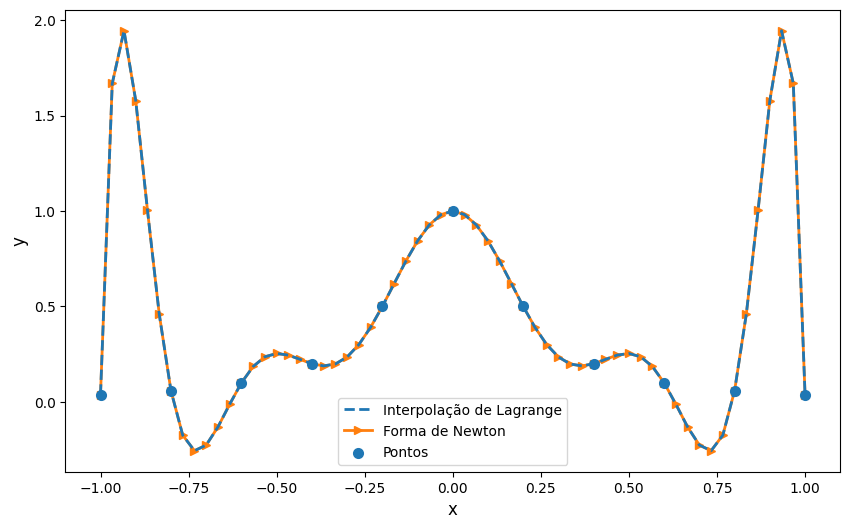

In [ ]:
xi = np.linspace(-1,1,num=11, endpoint=True) # 11 pontos igualmente espaçados
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exata = 1/(1+25*x**2)

y_lagrange11 = lagrange_interp(xi,yi,x)
y_newton11 = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange11,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton11,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

**c)** Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[0.03846154 0.04705882 0.05882353 0.0754717  0.1        0.13793103
 0.2        0.30769231 0.5        0.8        1.         0.8
 0.5        0.30769231 0.2        0.13793103 0.1        0.0754717
 0.05882353 0.04705882 0.03846154]


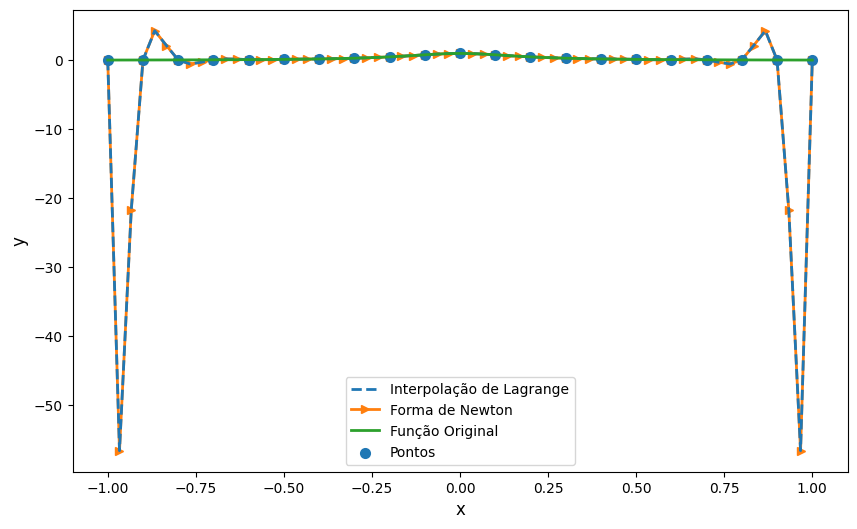

In [ ]:
xi = np.linspace(-1,1,num=21, endpoint=True) # 21 pontos igualmente espaçados
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exata = 1/(1+25*x**2)

y_lagrange21 = lagrange_interp(xi,yi,x)
y_newton21 = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange21,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton21,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exata,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

In [ ]:
# Calculando o erro máximo para as interpolações dos itens b), c) e o exemplo do item a

# Para 11 pontos igualmente espaçados
erro_lagrange11 = np.abs(y_lagrange11 - y_exata)
erro_newton11 = np.abs(y_newton11 - y_exata)

# Para 16 pontos igualmente espaçados
erro_lagrange16 = np.abs(y_lagrange16 - y_exata)
erro_newton16 = np.abs(y_newton16 - y_exata)

# Para 21 pontos igualmente espaçados
erro_lagrange21 = np.abs(y_lagrange21 - y_exata)
erro_newton21 = np.abs(y_newton21 - y_exata)


# Calculando os erros máximos para Newton e Lagrange, que esperasse que sejam iguais

print('Erro máximo para a interpolação de Lagrange com 11 nós igualmente espaçados:', np.max(erro_lagrange11), '\n')
print('Erro máximo para a interpolação de Lagrange com 16 nós igualmente espaçados:', np.max(erro_lagrange16), '\n')
print('Erro máximo para a interpolação de Lagrange com 21 nós igualmente espaçados:', np.max(erro_lagrange21), '\n')

print('\n')

print('Erro máximo para a interpolação de Newton com 11 nós igualmente espaçados:', np.max(erro_newton11), '\n')
print('Erro máximo para a interpolação de Newton com 16 nós igualmente espaçados:', np.max(erro_newton16), '\n')
print('Erro máximo para a interpolação de Newton com 21 nós igualmente espaçados:', np.max(erro_newton21), '\n')

Erro máximo para a interpolação de Lagrange com 11 nós igualmente espaçados: 1.9007638550703432 

Erro máximo para a interpolação de Lagrange com 16 nós igualmente espaçados: 2.0951533498841117 

Erro máximo para a interpolação de Lagrange com 21 nós igualmente espaçados: 56.63118692857714 



Erro máximo para a interpolação de Newton com 11 nós igualmente espaçados: 1.9007638550703723 

Erro máximo para a interpolação de Newton com 16 nós igualmente espaçados: 2.0951533498946517 

Erro máximo para a interpolação de Newton com 21 nós igualmente espaçados: 56.63118692857655 



É possível observar que, mesmo com o aumento no número de pontos, o erro das interpolações de Newton e Lagrange não diminui, pelo contrário, observa-se um aumento do erro de interpolação a medida que mais pontos são fornecidos, tal efeito pode ser explicado pelo Fenômeno de Rounge, o qual nos diz que o aumento do número de pontos não implica na convergência da interpolação para a função original. Em relação à função original,observa-se que a curva do polinômio interpolador é bastante distinta daquela observada para a função original, indicando um elevado erro de interpolação, mais elevado que aquele observado quando se tem menos pontos.

**d)** Usando a função scipy.interpolate.interp1d calcule a interpolação usando spline linear e cúbica. Exiba
os gráficos e comente as diferenças das soluções deste item para os anteriores.

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


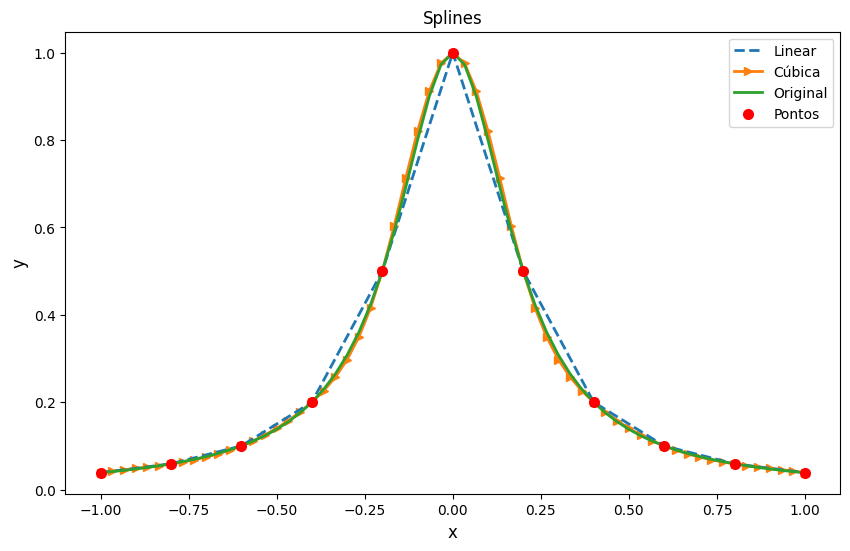

In [ ]:
# Utilizando as splines linear e cúbica(11 pontos)

xi = np.linspace(-1,1,num=11, endpoint=True) # 11 pontos igualmente espaçados
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exata = 1/(1+25*x**2)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x)
f_cúbica = interp1d(xi,yi, kind='cubic')
y_cúbica = f_cúbica(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cúbica,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exata,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

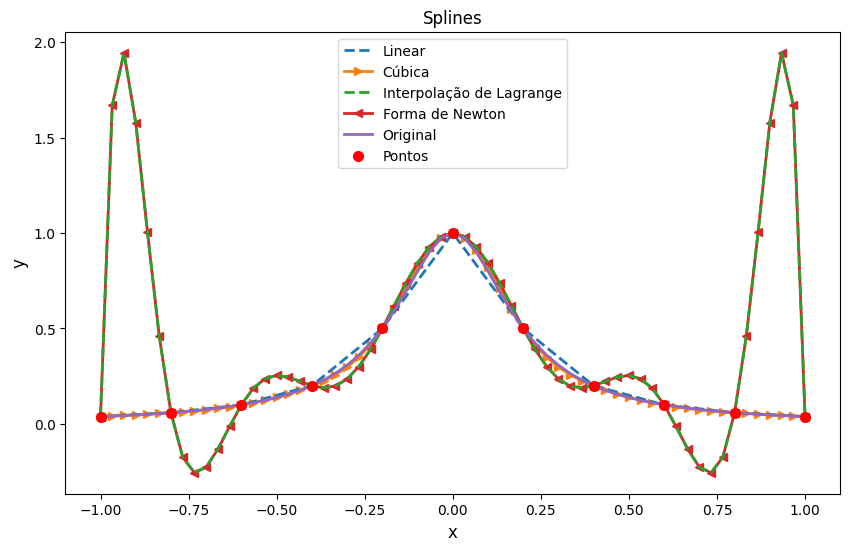

In [ ]:
# Gráfico que compara as duas splines com Newton e Lagrange

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cúbica,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_lagrange11,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton11,label = 'Forma de Newton',linewidth = 2,marker='<',zorder=1)
plt.plot(x,y_exata,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

In [ ]:
# Calculando o erro máximo para as splines linear e cúbica

# Para 11 pontos igualmente espaçados
erro_linear = np.abs(y_linear - y_exata)
erro_cúbica = np.abs(y_cúbica - y_exata)

print('Erro máximo para a spline linear com 11 nós igualmente espaçados:', np.max(erro_linear), '\n')
print('Erro máximo para a spline cúbica com 11 nós igualmente espaçados:', np.max(erro_cúbica), '\n')

Erro máximo para a spline linear com 11 nós igualmente espaçados: 0.06666666666666654 

Erro máximo para a spline cúbica com 11 nós igualmente espaçados: 0.020917105938331182 



[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[0.03846154 0.04705882 0.05882353 0.0754717  0.1        0.13793103
 0.2        0.30769231 0.5        0.8        1.         0.8
 0.5        0.30769231 0.2        0.13793103 0.1        0.0754717
 0.05882353 0.04705882 0.03846154]


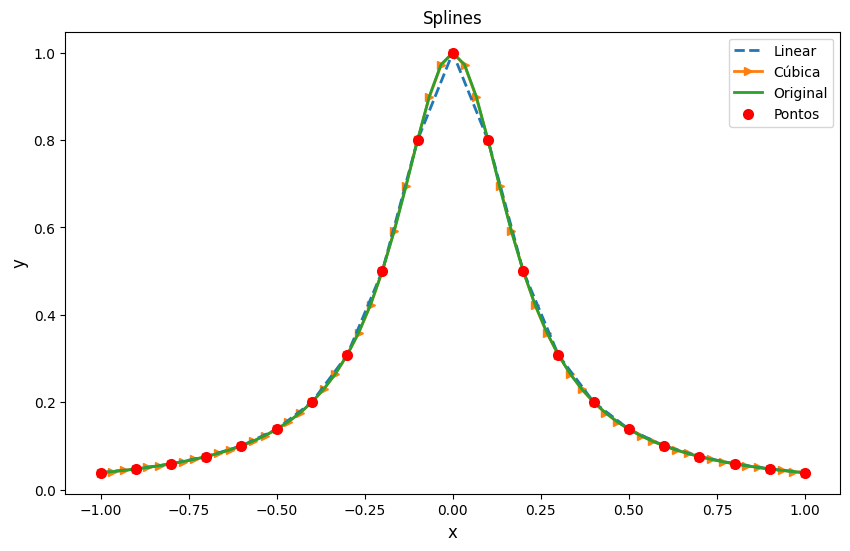

In [ ]:
# Utilizando as splines linear e cúbica(21 pontos)

xi = np.linspace(-1,1,num=21, endpoint=True) # 21 pontos igualmente espaçados
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exata = 1/(1+25*x**2)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x)
f_cúbica = interp1d(xi,yi, kind='cubic')
y_cúbica = f_cúbica(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cúbica,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exata,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

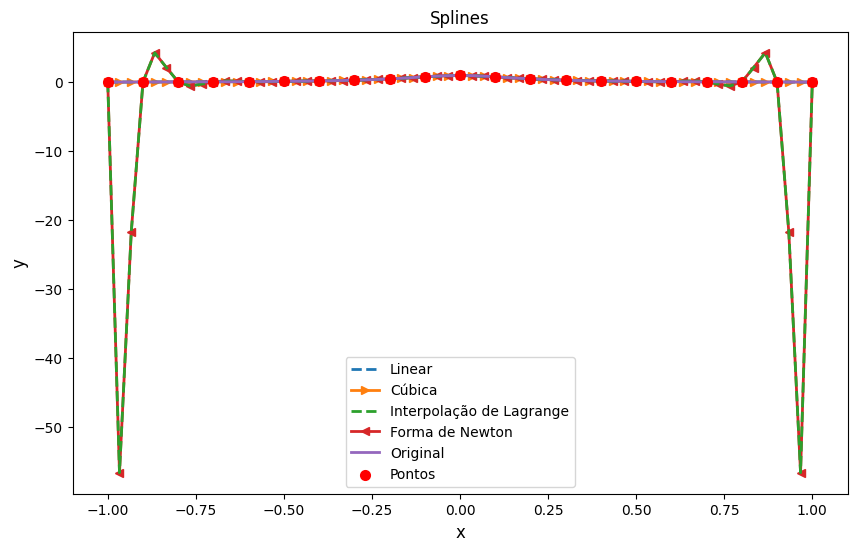

In [ ]:
# Gráfico que compara as duas splines com Newton e Lagrange

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cúbica,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_lagrange21,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton21,label = 'Forma de Newton',linewidth = 2,marker='<',zorder=1)
plt.plot(x,y_exata,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

In [ ]:
# Calculando o erro máximo para as splines linear e cúbica

# Para 21 pontos igualmente espaçados
erro_linear = np.abs(y_linear - y_exata)
erro_cúbica = np.abs(y_cúbica - y_exata)

print('Erro máximo para a spline linear com 21 nós igualmente espaçados:', np.max(erro_linear), '\n')
print('Erro máximo para a spline cúbica com 21 nós igualmente espaçados:', np.max(erro_cúbica), '\n')

Erro máximo para a spline linear com 21 nós igualmente espaçados: 0.03963963963963968 

Erro máximo para a spline cúbica com 21 nós igualmente espaçados: 0.0028346626019896126 



É possível observar uma melhoria na interpolação por meio das splines cúbica e linear quando comparadas aos métodos de Newton e Lagrange, o que nos permite uma melhor aproximação em relação à função original, além disso, é perceptível uma redução no erro de interpolação a medida que novos pontos são fornecidos, escapando do Fenôneno de Rounge. No comparativo entre as duas splines, temos que a spline cúbica apresentou um melhor desempenho no procedimento de interpolação do que a spline linear, tal conclusão pode ser observada ao se comparar o ajuste de ambas em relação à função original, uma vez que a spline cúbica possui um erro menor e um ajuste melhor para a função apresentada.

**e)** Repita os itens b) e c) com nós de Chebyshev

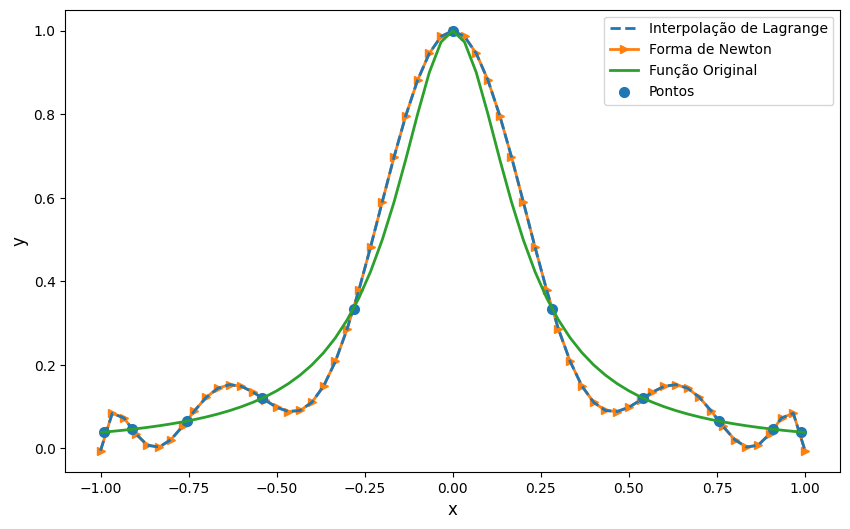

In [ ]:
# Repetindo o item b com nós de Chebshev

a = -1; b = 1
# 11 nós de interpolação
n = 10
xi = np.zeros(n+1)
i = np.arange(n+1)
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*m.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2)

y_lagrange11 = lagrange_interp(xi,yi,x)
y_newton11 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange11,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton11,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exata,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

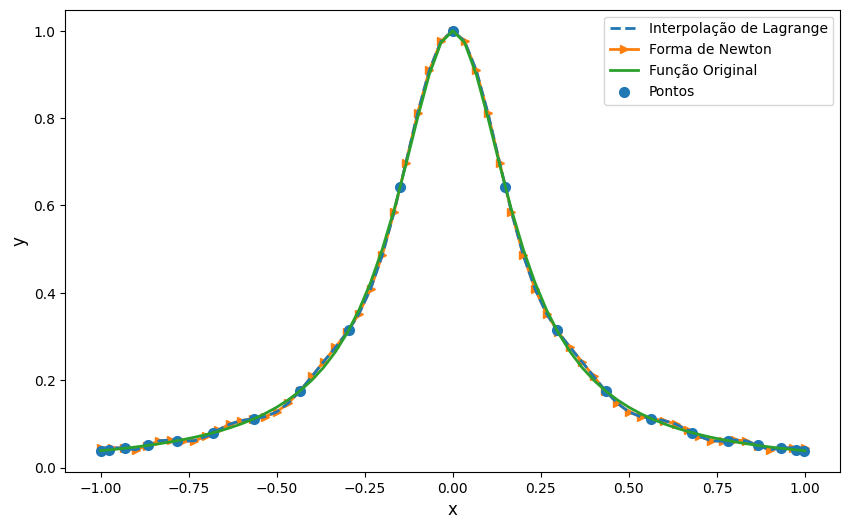

In [ ]:
# Repetindo o item c com nós de Chebshev

a = -1; b = 1
# 21 nós de interpolação
n = 20
xi = np.zeros(n+1)
i = np.arange(n+1)
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*m.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2)

y_lagrange21 = lagrange_interp(xi,yi,x)
y_newton21 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange21,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton21,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exata,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

In [ ]:
# Calculando o erro máximo para os nós de Chebyshev

# Para 11 pontos igualmente espaçados
erro_chebyshev1 = np.abs(y_lagrange11 - y_exata)
erro_chebyshev2 = np.abs(y_newton11 - y_exata)

# Para 21 pontos igualmente espaçados
erro_chebyshev3 = np.abs(y_lagrange21 - y_exata)
erro_chebyshev4 = np.abs(y_newton21 - y_exata)

# Calculando os erros máximos para os nós de Chebyshev com interpolação de Newton e Lagrange, que esperasse que sejam iguais

print('Erro máximo para os nós de Chebyshev com interpolação de Lagrange e 11 nós igualmente espaçados:', np.max(erro_chebyshev1), '\n')
print('Erro máximo para os nós de Chebyshev com interpolação de Lagrange e 21 nós igualmente espaçados:', np.max(erro_chebyshev3), '\n')

print('\n')

print('Erro máximo para os nós de Chebyshev com interpolação de Newton e 11 nós igualmente espaçados:', np.max(erro_chebyshev2), '\n')
print('Erro máximo para os nós de Chebyshev com interpolação de Newton e 21 nós igualmente espaçados:', np.max(erro_chebyshev4), '\n')

Erro máximo para os nós de Chebyshev com interpolação de Lagrange e 11 nós igualmente espaçados: 0.10789254378053126 

Erro máximo para os nós de Chebyshev com interpolação de Lagrange e 21 nós igualmente espaçados: 0.014823665338939584 



Erro máximo para os nós de Chebyshev com interpolação de Newton e 11 nós igualmente espaçados: 0.10789254378053115 

Erro máximo para os nós de Chebyshev com interpolação de Newton e 21 nós igualmente espaçados: 0.014823665338942305 



Com os nós de Chebyshev, observamos que o erro de interpolação para os métodos de Newton e Lagrange é menor que o observado quando os nós são igualmente espaçados, além disso, a medida que mais pontos são fornecidos, o erro de interpolação diminui e o polinômio interpolador tende a convergir para a função original, escapando, portanto, do Fenômeno de Rounge.

**3 Mínimos Quadrados**

Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020
a 18 de junho de 2020 são dados em casosacumuladosbrasilatuaizado.txt. O objetivo deste exercício é estudar o
ajuste dos dados, no sentido dos mínimos quadrados, a uma função g(x) = ab^x
, com a, b ∈ R. Vamos utilizar os
códigos implementados em aula:

In [ ]:
# Lendo o arquivo txt

# função para ler csv e armazenar os dados lidos em uma matriz
def le_e_armazena(arquivo):
  df = []
  valores = []
  arq = open(arquivo,'rt')
  while True:
    valores_float = []
    linha = arq.readline() # Lê apenas uma linha arquivo
    valores = linha.split(sep = ',')
    for v in valores: # Converte strings em float quando possível
      try:
        valores_float.append(float(v))
      except:
        valores_float.append(v)
    df.append(valores_float)
    if not linha:
      break
  return df
x = []
y = le_e_armazena('casosacumuladosbrasilatuaizado.txt')
y.pop()
for i in y:
  x.append(int(i[0]))
print(x) # Exibindo uma lista com todos os valores dos dados fornecidos

[1, 1, 1, 2, 2, 2, 2, 3, 7, 13, 19, 25, 25, 34, 52, 77, 98, 121, 200, 234, 291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3903, 4256, 4579, 5717, 6834, 7910, 9056, 10278, 11130, 12056, 13717, 15927, 17857, 19638, 20727, 22169, 23430, 25262, 28320, 30425, 33682, 36599, 38654, 40581, 43079, 45757, 49492, 52995, 58509, 61888, 66501, 71886, 78162, 85380, 91299, 96396, 101147, 107780, 114715, 125218, 135106, 145328, 155939, 162699, 168331, 177589, 188974, 202918, 218223, 233142, 241080, 254220, 271628, 291579, 310087, 330890, 347398, 363211, 374898, 391222, 411821, 438238, 465166, 498440, 514200, 526447, 555383, 584016, 614941, 645771, 672846, 691758, 707412, 739503, 772416, 802828, 828810, 850514, 867624, 888271, 923189, 955377, 978142, 1032913, 1067579, 1085038, 1106470]


Alguns gráficos para entender o que estava acontecendo

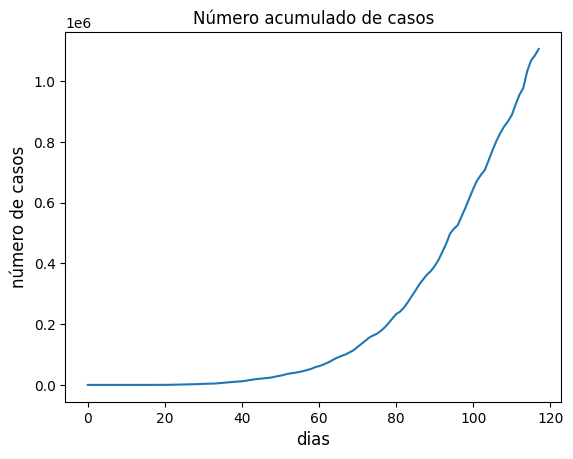

In [ ]:
# plotando as frequências acumuladas

plt.plot(x)
plt.xlabel('dias',fontsize='large')
plt.ylabel('número de casos',fontsize='large')
plt.title('Número acumulado de casos')
plt.show()

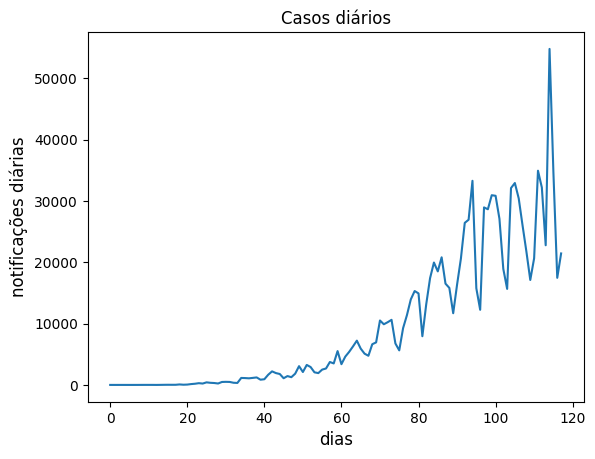

In [ ]:
# Observando o comportamento diário da pandemia ao longo do período analisado

casos_dia = [] # Criando uma lista para armazenar os casos diários
for i in range(len(x)):
  if i == 0: # Se for o primeiro dia
    casos_dia.append(x[i])
  else:
    dia = x[i] - x[i-1] # Acumulada do dia - Acumulada do dia anterior
    casos_dia.append(dia)

# Plotando o número diário de casos
plt.plot(casos_dia)
plt.xlabel('dias',fontsize='large')
plt.ylabel('notificações diárias',fontsize='large')
plt.title('Casos diários')
plt.show()

In [ ]:
# organizando os dias em uma lista

dias = []
for i in range(len(x)):
  dia = i
  dias.append(dia)

print(dias)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


**a)** Explique cada um dos códigos dados abaixo. O que está sendo calculado ?

In [ ]:
# Implementação do MMQ - Discreto

def mmq(x,y,k): # x = dados, y = informações obtidas a partir dos dados, k = reta/curva polinomial
    X = np.vander(x,k); # Construindo a matriz de Vandermonde, o vetor unitário foi inserido na última coluna
    A = np.transpose(X).dot(X) # Obtendo a matriz A a partir do produto entre a transposta da matriz de Vandermonde e de sua forma original
    b = np.transpose(X).dot(y) # Obtendo o vetor b pelo produto entre a transposta da matriz de Vandermonde e y
    a = np.linalg.solve(A,b) # Resolvendo o sistema linear Ax = b

    return a # Retornando o resultado desse sistema

def mmq_qr(x,y,k): # x = dados, y = informações obtidas a partir dos dados, k = reta/curva polinomial
    X = np.vander(x,k); # Construindo a matriz de Vandermonde, o vetor unitário foi inserido na última coluna
    (Q,R) = np.linalg.qr(X) # Encontrando a decomposição QR da matriz de Vandermonde
    b = np.transpose(Q).dot(y) # Obtendo o vetor b pelo produto entre a transposta da matriz Q e y
    a = np.linalg.solve(R,b) # Resolvendo o sistema linear Rx = b

    return a # Retornando o resultado desse sistema

 Para a função mmq, temos a construção da matriz de Vandermonde, com as colunas variando de x^(k - 1)(primeiro coluna) até um vetor unitário(última coluna), a obtenção da matriz A pelo produto da transposta da matriz de Vandermonde pela sua forma original, o cálculo do vetor b pelo produto entre a matriz de Vandermonde e y, seguidas pela resolução do sistema linear Ax = b e o retorno do resultado obtido.

  Para a função mmq_qr, observa-se o mesmo procedimento para a construção da matriz de Vandermonde que na função anterior, porém, neste caso, realiza-se a decomposição QR da matriz de Vandermonde, obtendo-se o vetor b a partir do produto entre a transposta da matriz Q(Ortogonal) e y, seguido da resolução do sistema linear Rx = b, em que R é uma matriz triangular superior, e, por fim, obtendo o resultado da rresolução desse sistema.

**b)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020
a 18 de junho de 2020, por uma funçãoo g(x) = ab^x
, com a, b ∈ R. Use um dos códigos dados acima.

[0.10557731 3.56425234]


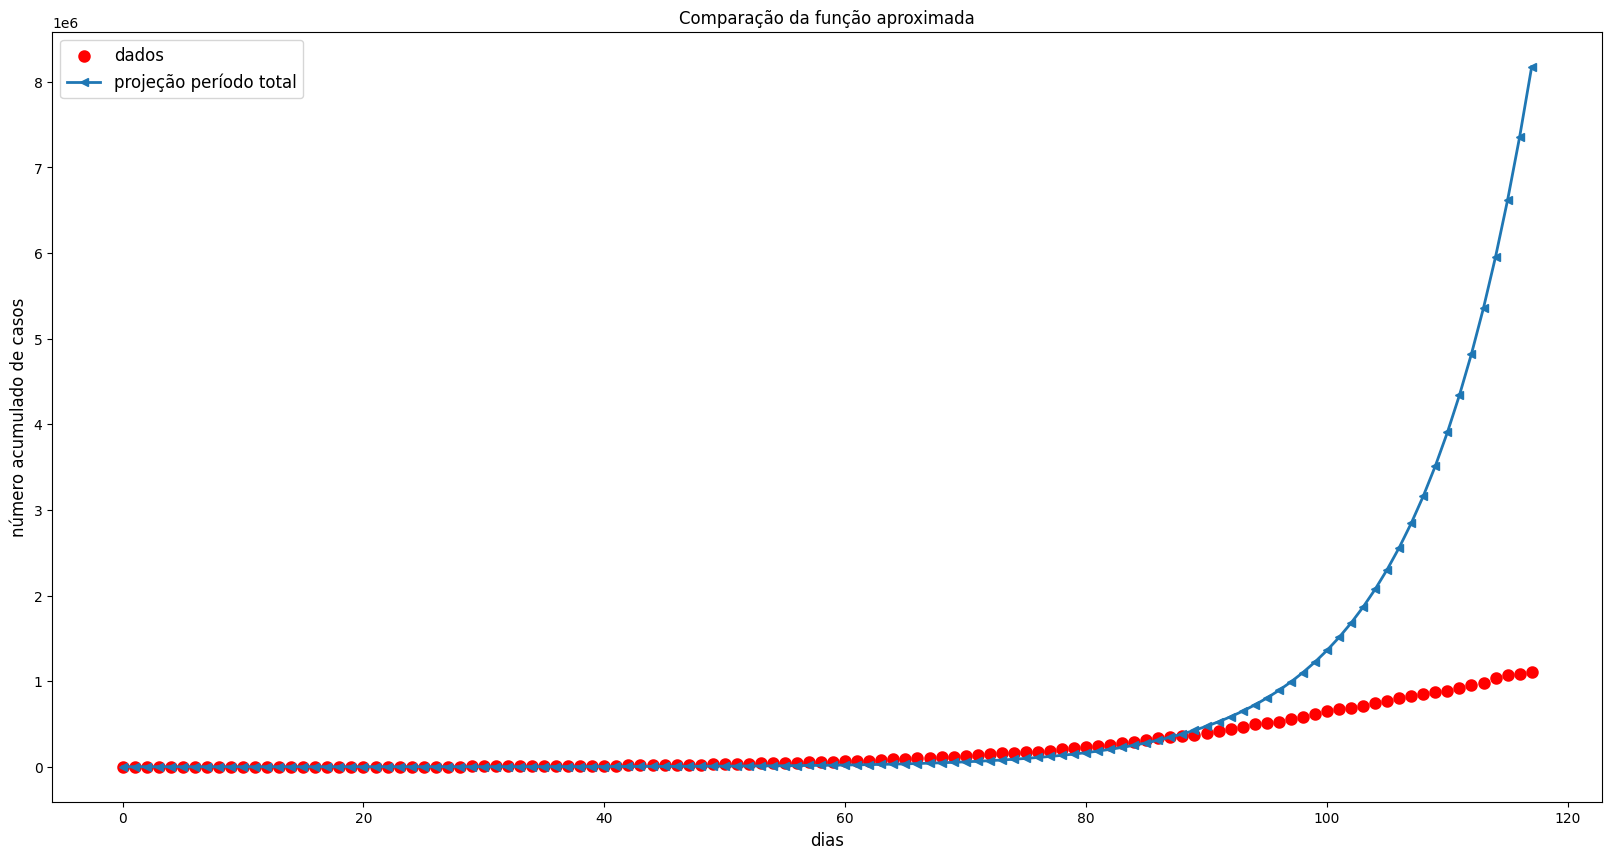

In [ ]:
def mmq_qr(x,y,k): # x = dias, y = ln(dados), k = reta/curva polinomial
    X = np.vander(x,k); # Construindo a matriz de Vandermonde, o vetor unitário foi inserido na última coluna
    (Q,R) = np.linalg.qr(X) # Encontrando a decomposição QR da matriz de Vandermonde
    b = np.transpose(Q).dot(y) # Obtendo o vetor b pelo produto entre a transposta da matriz Q e y
    a = np.linalg.solve(R,b) # Resolvendo o sistema linear Rx = b

    return a # Retornando o resultado desse sistema

# Fazendo o ln dos dados(linearização dos dados)
logx = []
for i in range(len(x)):
    log = m.log(x[i])
    logx.append(log)

a_qr = mmq_qr(dias, logx, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x_cont = np.linspace(0, len(x) - 1, num= 118, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20, 10), facecolor='white')
plt.scatter(dias, x, label='dados', linewidth=3, color='red')
plt.plot(x_cont, f(x_cont), label='projeção período total', linewidth=2, marker='<')
plt.xlabel('dias', fontsize='large')
plt.ylabel('número acumulado de casos', fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

**c)** Repita o item b) usando apenas os 20 primeiros dias.


[ 0.31606415 -0.5166066 ]


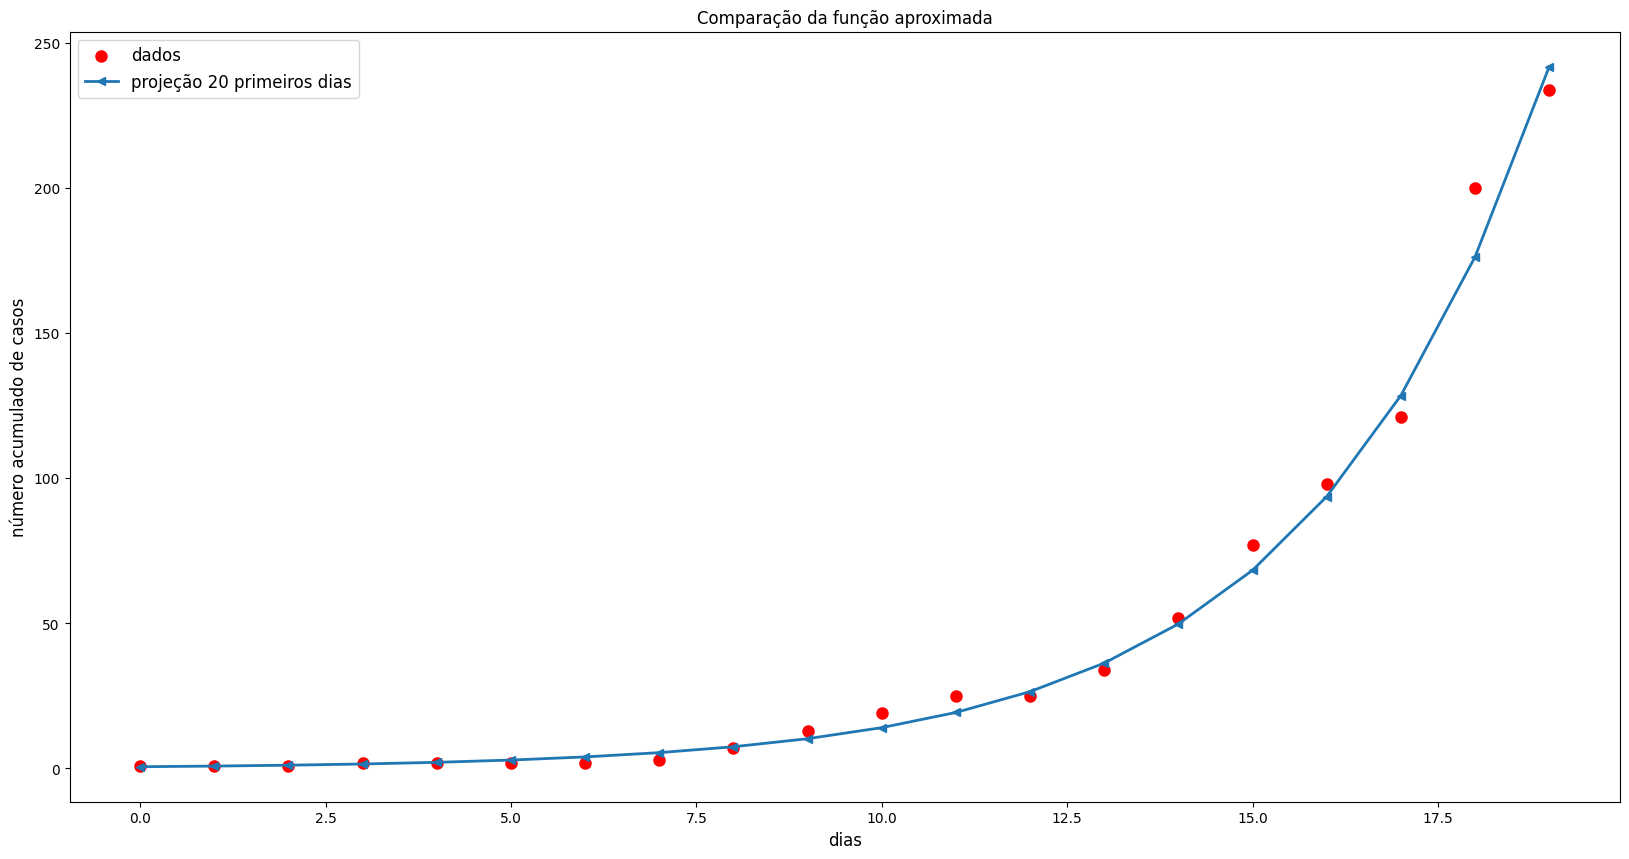

In [ ]:
x2 = x[0:20] # Filtrando os vinte primeiros dados
dias2 = dias[0:20] # Filtrando os 20 primeiros dias

# Fazendo o ln dos dados(linearização dos dados)
logx2 = []
for i in range(len(x2)):
    log = m.log(x2[i])
    logx2.append(log)

a_qr = mmq_qr(dias2, logx2, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x2_cont = np.linspace(0, len(x2) - 1, num=20, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20, 10), facecolor='white')
plt.scatter(dias2, x2, label='dados', linewidth=3, color='red')
plt.plot(x2_cont, f(x2_cont), label='projeção 20 primeiros dias', linewidth=2, marker='<')
plt.xlabel('dias', fontsize='large')
plt.ylabel('número acumulado de casos', fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

**d)** Repita o item b) usando apenas os 50 últimos dias.

[0.04763795 8.52265873]


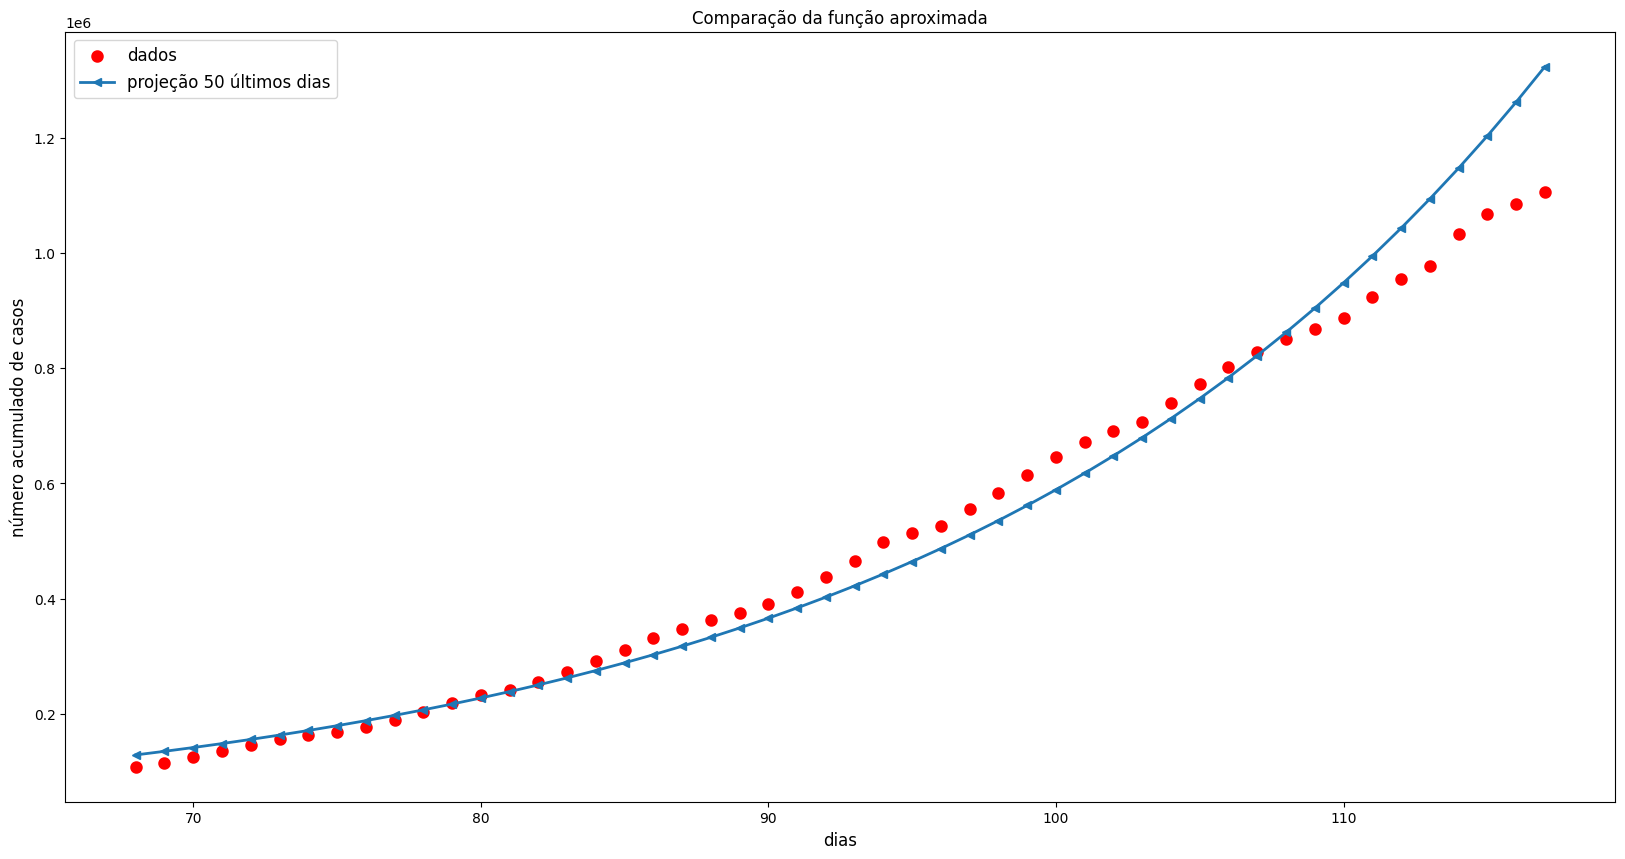

In [ ]:
x3 = x[len(x)-50:len(x)] # Filtrando os cinquenta últimos dados
dias3 = dias[len(x)-50:len(x)] # Filtrando os 50 últimos dias

# Fazendo o ln dos dados(linearização dos dados)
logx3 = []
for i in range(len(x3)):
    log = m.log(x3[i])
    logx3.append(log)

a_qr = mmq_qr(dias3, logx3, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x3_cont = np.linspace(len(x) - 50, len(x) - 1, num=50, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20, 10), facecolor='white')
plt.scatter(dias3, x3, label='dados', linewidth=3, color='red')
plt.plot(x3_cont, f(x3_cont), label='projeção 50 últimos dias', linewidth=2, marker='<')
plt.xlabel('dias', fontsize='large')
plt.ylabel('número acumulado de casos', fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

**e)** Compare os itens b), c) e d). Que tipo de informação os dados nos fornecem ?

[0.10557731 3.56425234]
[ 0.31606415 -0.5166066 ]
[0.04763795 8.52265873]


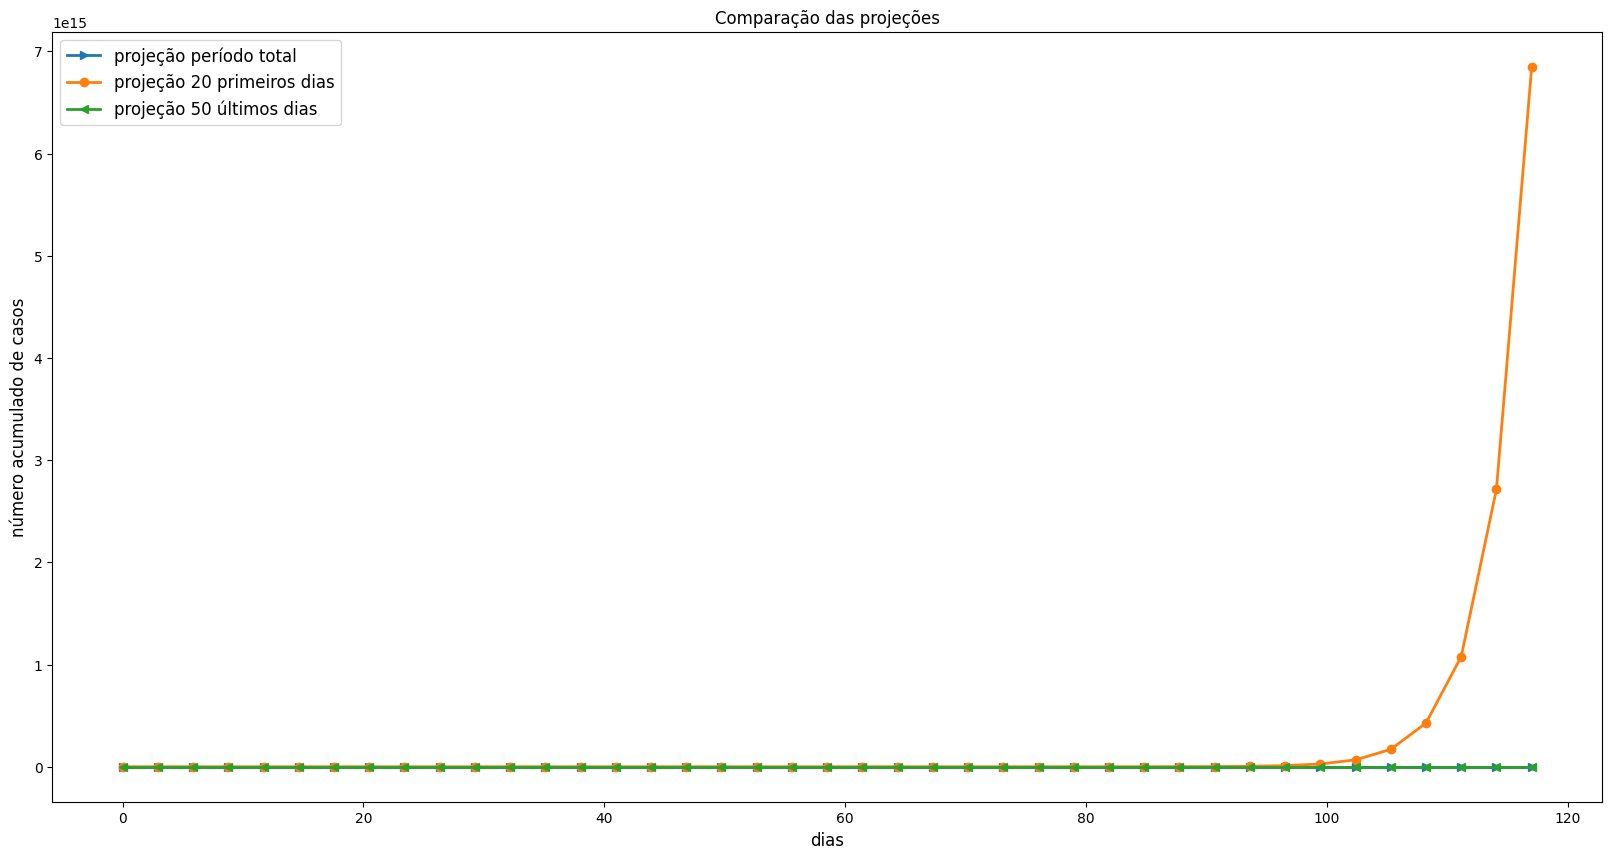

In [ ]:
# Gráfico comparativo com as projeções dos itens b),c) e d)

plt.figure(figsize=(20, 10), facecolor='white')

# Fazendo o ln dos dados(linearização dos dados)
logx = []
for i in range(len(x)):
    log = m.log(x[i])
    logx.append(log)

a_qr = mmq_qr(dias, logx, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x_cont = np.linspace(0, len(x) - 1, num= 41, endpoint=True)

plt.plot(x_cont, f(x_cont), label='projeção período total', linewidth=2, marker='>')

x2 = x[0:20] # Filtrando os vinte primeiros dados
dias2 = dias[0:20] # Filtrando os 20 primeiros dias

# Fazendo o ln dos dados
logx2 = []
for i in range(len(x2)):
    log = m.log(x2[i])
    logx2.append(log)

a_qr = mmq_qr(dias2, logx2, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x2_cont = np.linspace(0, len(x) - 1, num=41, endpoint=True)

plt.plot(x2_cont, f(x2_cont), label='projeção 20 primeiros dias', linewidth=2, marker='o')

x3 = x[len(x)-50:len(x)] # Filtrando os cinquenta últimos dados
dias3 = dias[len(x)-50:len(x)] # Filtrando os 50 últimos dias

# Fazendo o ln dos dados
logx3 = []
for i in range(len(x3)):
    log = m.log(x3[i])
    logx3.append(log)

a_qr = mmq_qr(dias3, logx3, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x3_cont = np.linspace(0, len(x) - 1, num=41, endpoint=True)

plt.plot(x3_cont, f(x3_cont), label='projeção 50 últimos dias', linewidth=2, marker='<')

plt.xlabel('dias', fontsize='large')
plt.ylabel('número acumulado de casos', fontsize='large')
plt.title('Comparação das projeções')
plt.legend(fontsize='large')
plt.show()

[0.10557731 3.56425234]
[0.04763795 8.52265873]


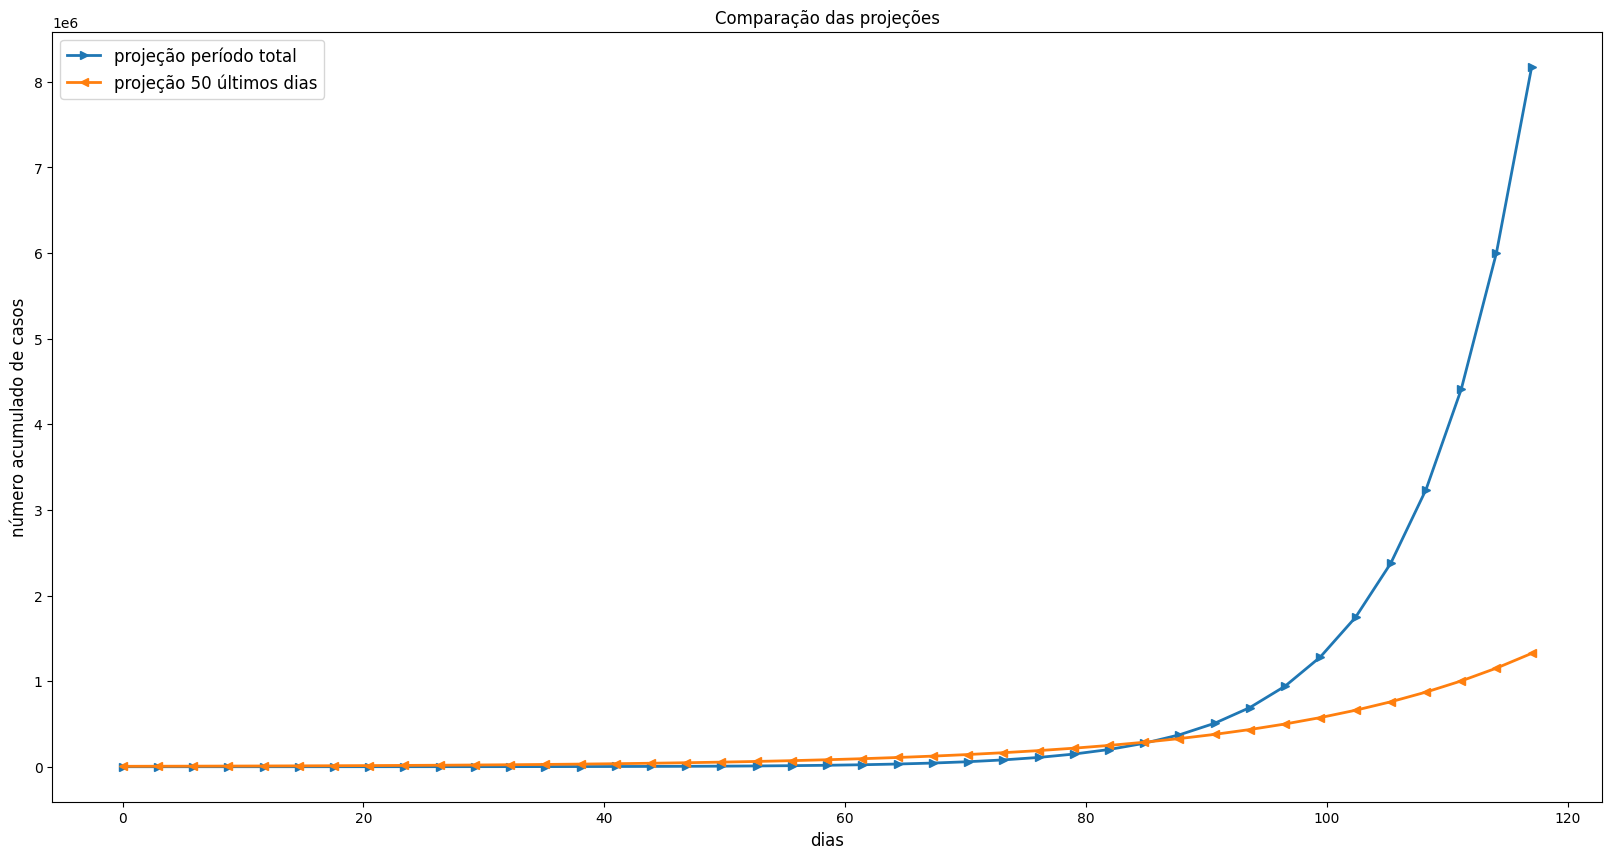

In [ ]:
# Excluindo a projeção para os 20 primeiros dias, realizada com dados do início da pandemia

plt.figure(figsize=(20, 10), facecolor='white')

# Fazendo o ln dos dados(linearização dos dados)
logx = []
for i in range(len(x)):
    log = m.log(x[i])
    logx.append(log)

a_qr = mmq_qr(dias, logx, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x_cont = np.linspace(0, len(x) - 1, num= 41, endpoint=True)

plt.plot(x_cont, f(x_cont), label='projeção período total', linewidth=2, marker='>')

x3 = x[len(x)-50:len(x)] # Filtrando os cinquenta últimos dados
dias3 = dias[len(x)-50:len(x)] # Filtrando os 50 últimos dias

# Fazendo o ln dos dados
logx3 = []
for i in range(len(x3)):
    log = m.log(x3[i])
    logx3.append(log)

a_qr = mmq_qr(dias3, logx3, 2)  # usamos 2 pois queremos uma reta
print(a_qr)

p_qr = lambda x: a_qr[1] + a_qr[0] * x
f = lambda x: m.exp(a_qr[1]) * m.exp(a_qr[0]) ** x

x3_cont = np.linspace(0, len(x) - 1, num=41, endpoint=True)

plt.plot(x3_cont, f(x3_cont), label='projeção 50 últimos dias', linewidth=2, marker='<')

plt.xlabel('dias', fontsize='large')
plt.ylabel('número acumulado de casos', fontsize='large')
plt.title('Comparação das projeções')
plt.legend(fontsize='large')
plt.show()

No item b, observamos uma projeção feita baseada nos primeiros casos da pandemia, e em medidas de controle cuja eficácia vinha sendo questionada, o que faz com que a curva esperada para um período de quatro meses se distancie do cenário observado, uma vez que a avaliação leva em conta um cenário mais pessimista.

Já no item c observamos apenas o período inicial da pandemia, onde medidas de controlo ainda não haviam sido, ou haviam sido recentemente implementadas,e como tais efeitos são de longo prazo e o tempo de inoculação do vírus pode levar alguns dias, temos que a curva exponencial projetada se ajusta muito bem ao comportamento dos dados observados até então.

Para o item d, por sua vez, temos que o ajuste foi feito já durante o pico da pandemia, o que leva a coeficientes relativamente menores para a curva exponencial, o que faz com que esta cresça a uma taxa muito menor, permitindo-lhe um bom ajuste em relação aos dados verificados.

Ao análisar as 3 projeções para todo o período análisado, verificamos que a projeção realizada nos 20 primeiros dias cresce muito mais rápido que as outras duas, uma vez que esta não leva em consideração nenhuma medida de controle epidemiológico, já para a projeção baseada nos 50 últimos dias, temos uma fase mais amadurecida de coleta dos dados, onde medidas de controle já haviam sido implementadas, o que nos permite uma aproximação mais conservadora e que se aproxima bastante da realidade observada. Para aquela construída analisando-se todo o período onde há dados disponíveis, temos uma projeção que leva em conta as medidas de controle, entretanto, como tais medidas não vinham sendo levadas a sério pelo governo e pela população, resulta em uma projeção mais pessimista em relação aos dados observados, porém mais realista que aquela que assume a propagação irrestrita do vírus. É importante ressaltar, no entanto, que a subnotificação dos casos, bem como a falta de testagem, pode ser um fator a ser levado em consideração para que os casos acumulados tenham ficado abaixo das projeções, principalmente aquela feita com base nos dados coletados para todo o período analisado.